In [6]:
import sklearn

from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.covariance import EmpiricalCovariance, EllipticEnvelope, GraphicalLasso, MinCovDet

from skelm import ELMClassifier


# from sklearn.utils import all_estimators
# classifiers = all_estimators(type_filter="classifier")


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.metrics import confusion_matrix

import random
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn_image as isns

isns.set_image(origin="upper")
sns.set_style("darkgrid")

from torchvision.io import read_image
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor

from utils import CustomImageDataset

In [7]:
label_names = {0: "tree", 1:"sun", 2:"fish", 3:"bird", 4:"flower"}

In [8]:
train_dataset = CustomImageDataset("./data/train_data.csv")
test_dataset = CustomImageDataset("./data/test_data.csv")

In [9]:
input_train_matrix, target_train_matrix = train_dataset.as_matrix()
input_test_matrix, target_test_matrix = test_dataset.as_matrix()

In [10]:
pca_components = 25

build_pipe = lambda c: Pipeline([
    ('flatten', FunctionTransformer(lambda x: x.reshape(x.shape[0], -1))),
    ('scaler', MinMaxScaler()),
    ('dim_reduce', PCA(n_components=pca_components)),
    ('classifier', c)
])

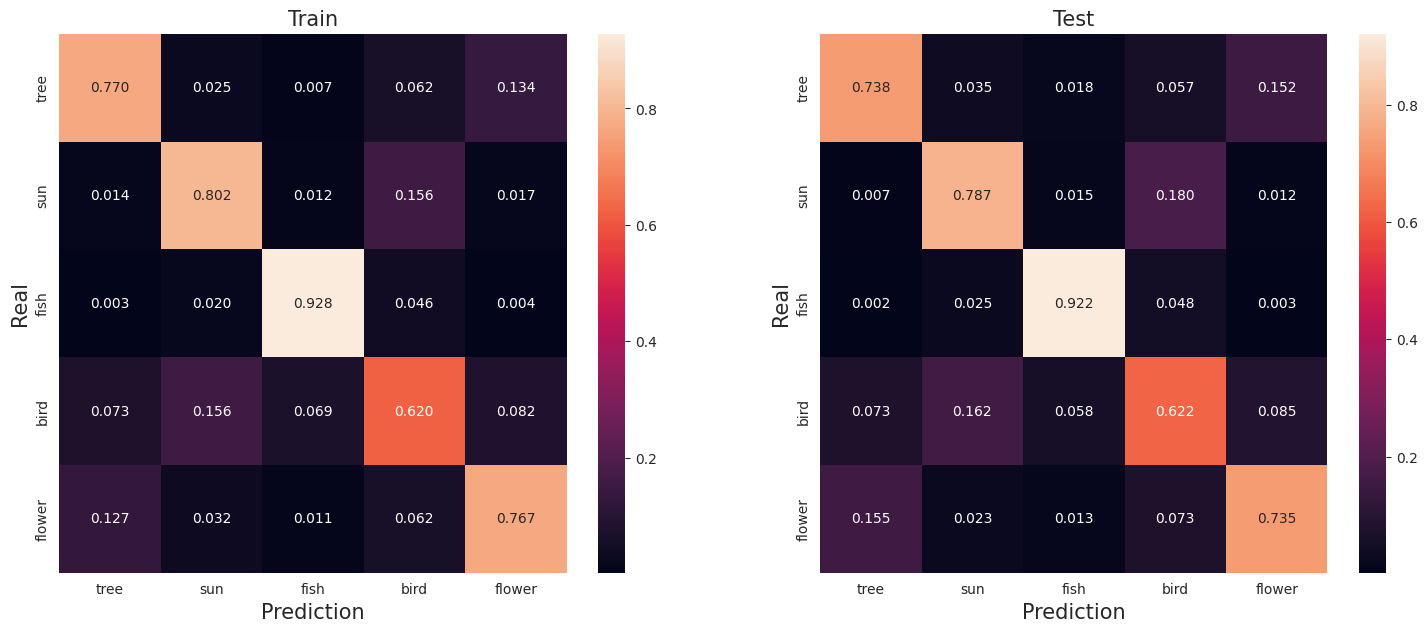

In [11]:
pipe = build_pipe(LogisticRegression())

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()

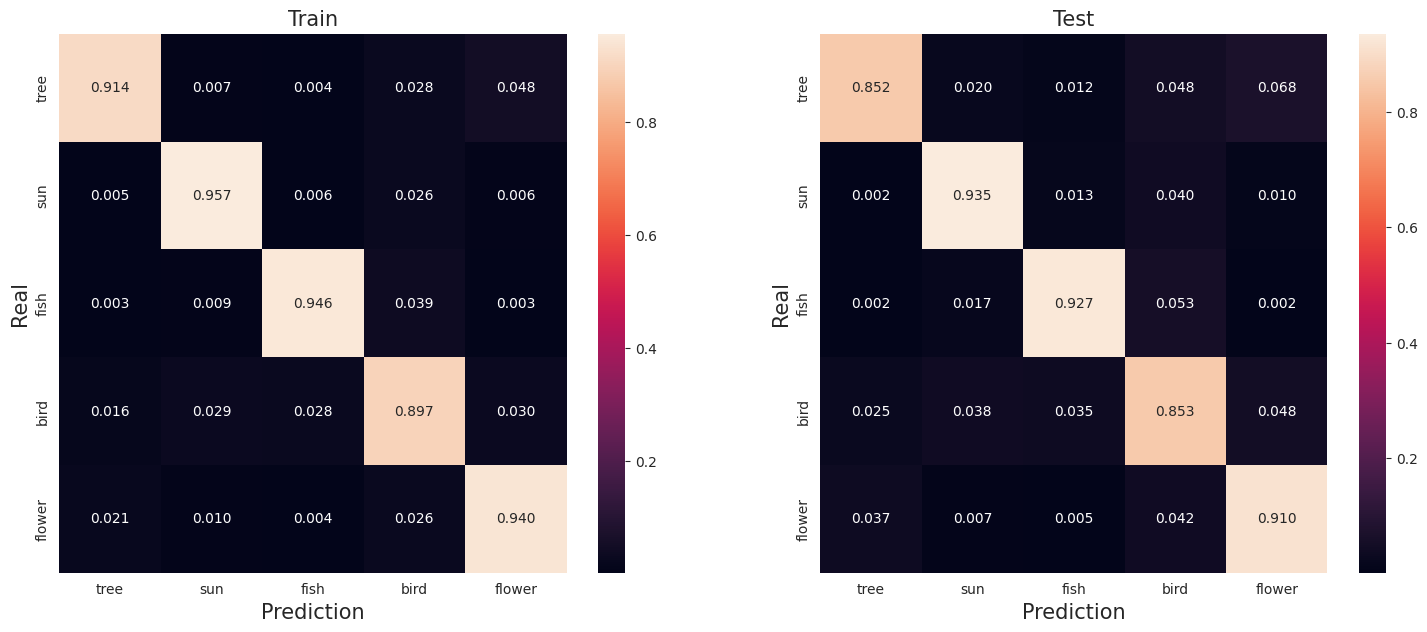

In [12]:
pipe = build_pipe(SVC(kernel="rbf"))

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()

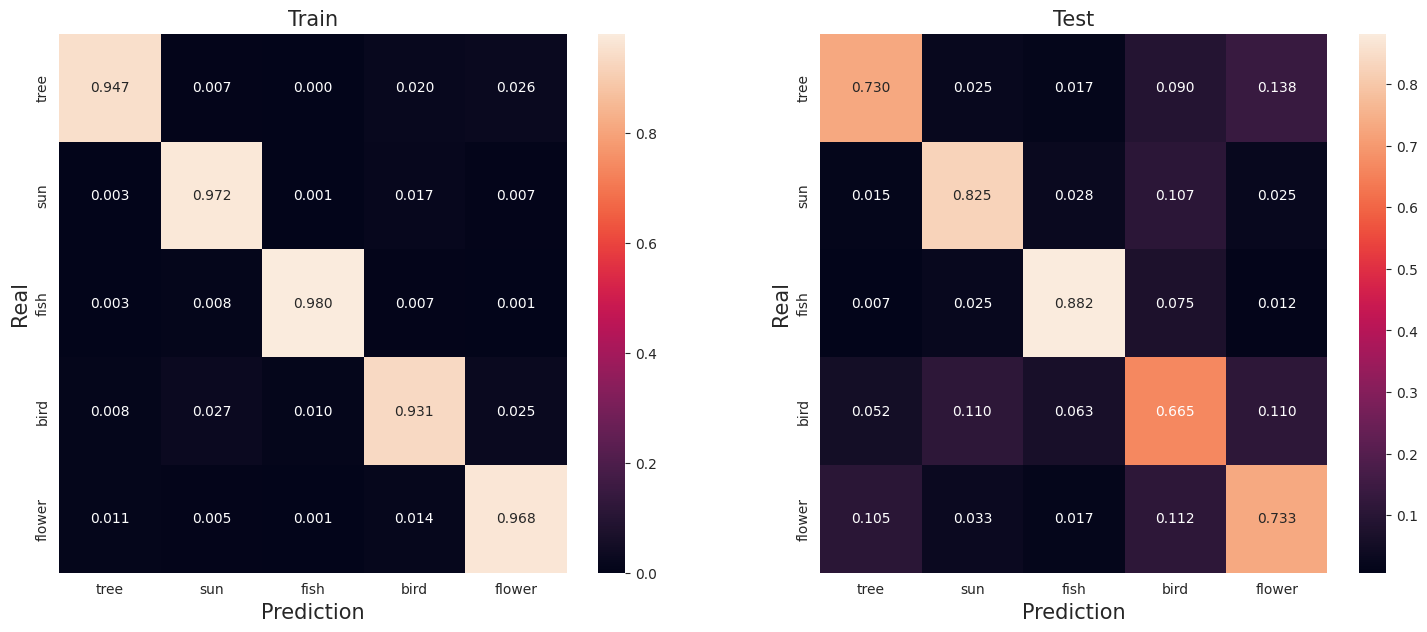

In [13]:
pipe = build_pipe(DecisionTreeClassifier(max_depth=15))

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()

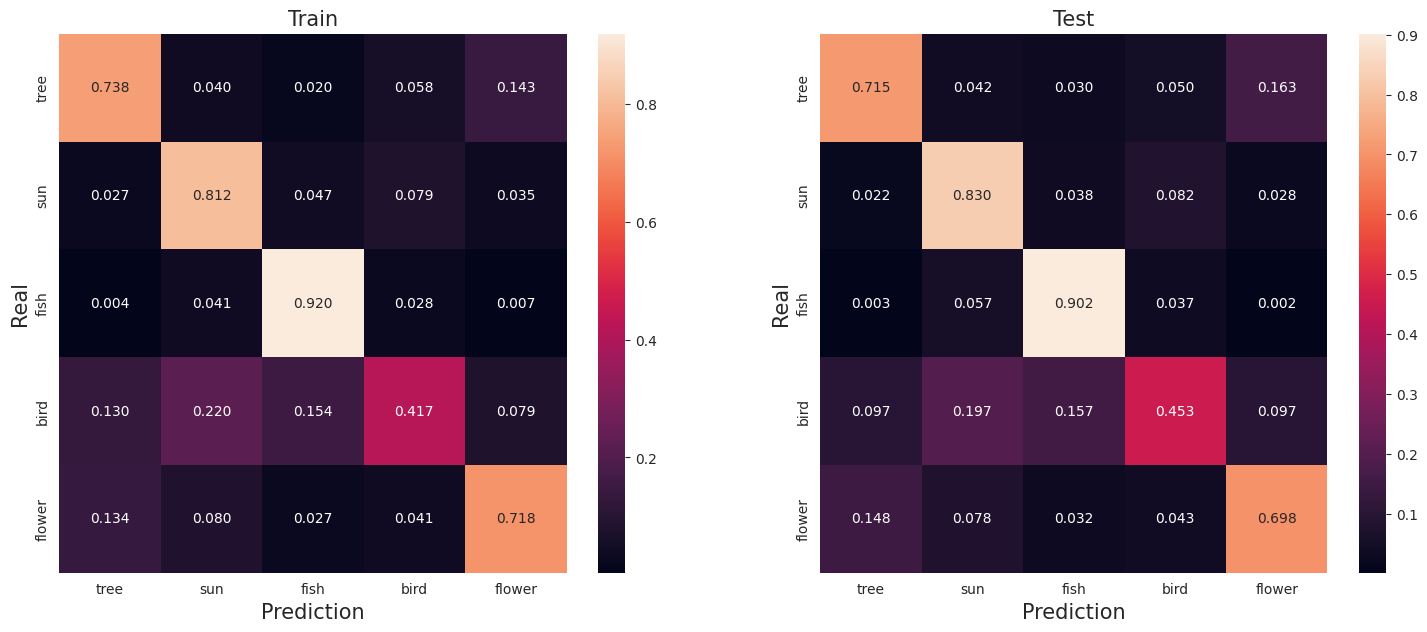

In [14]:
pipe = build_pipe(ELMClassifier(n_neurons=30, ufunc="relu"))

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()

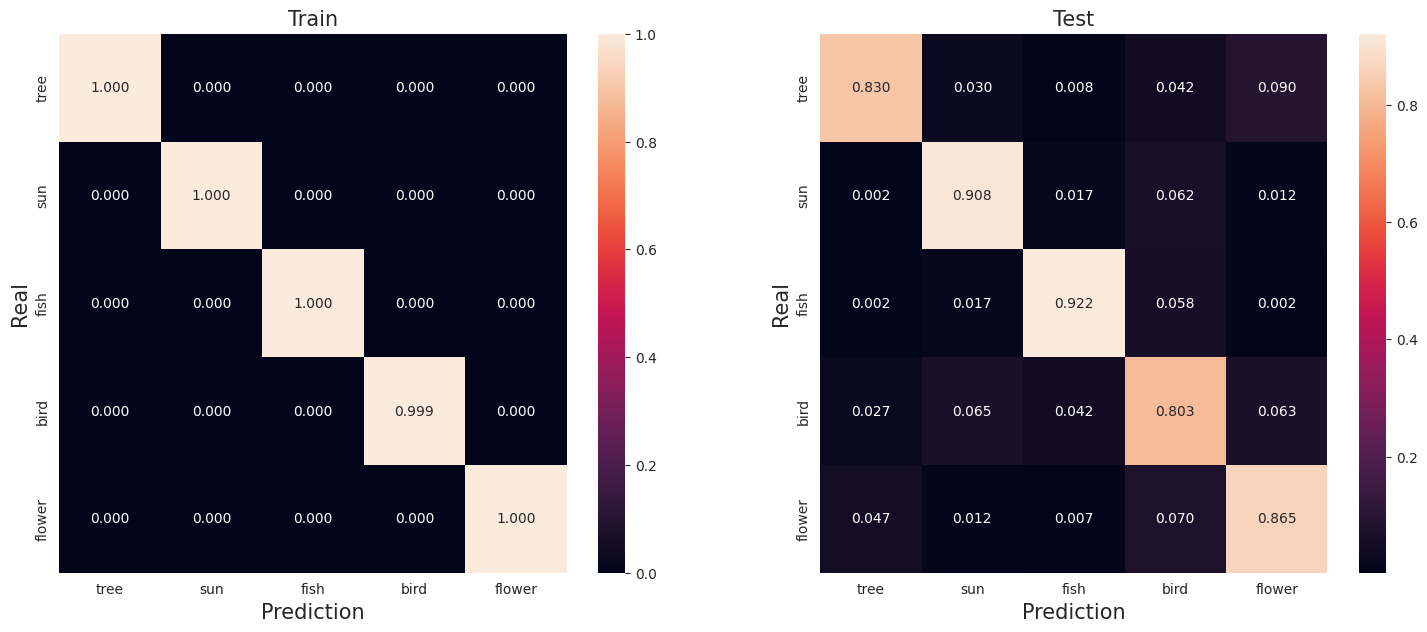

In [15]:
pipe = build_pipe(RandomForestClassifier())

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()

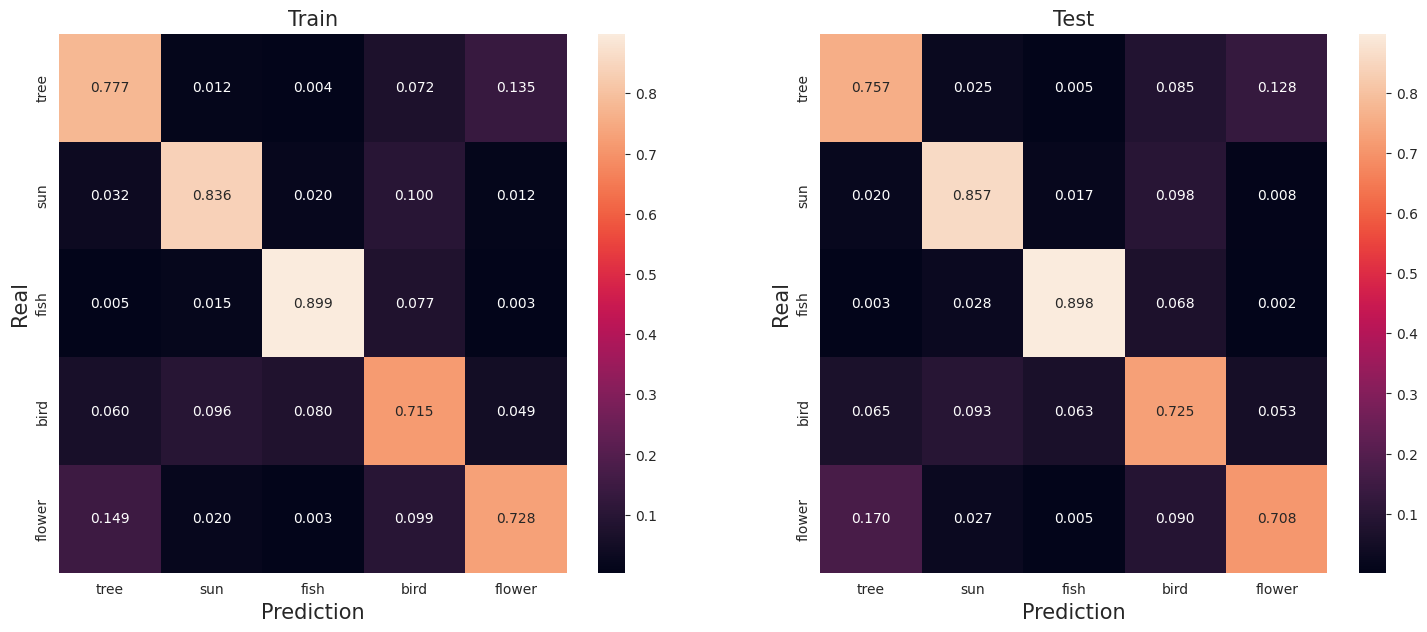

In [16]:
pipe = build_pipe(GaussianNB(var_smoothing=1e-9))

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()

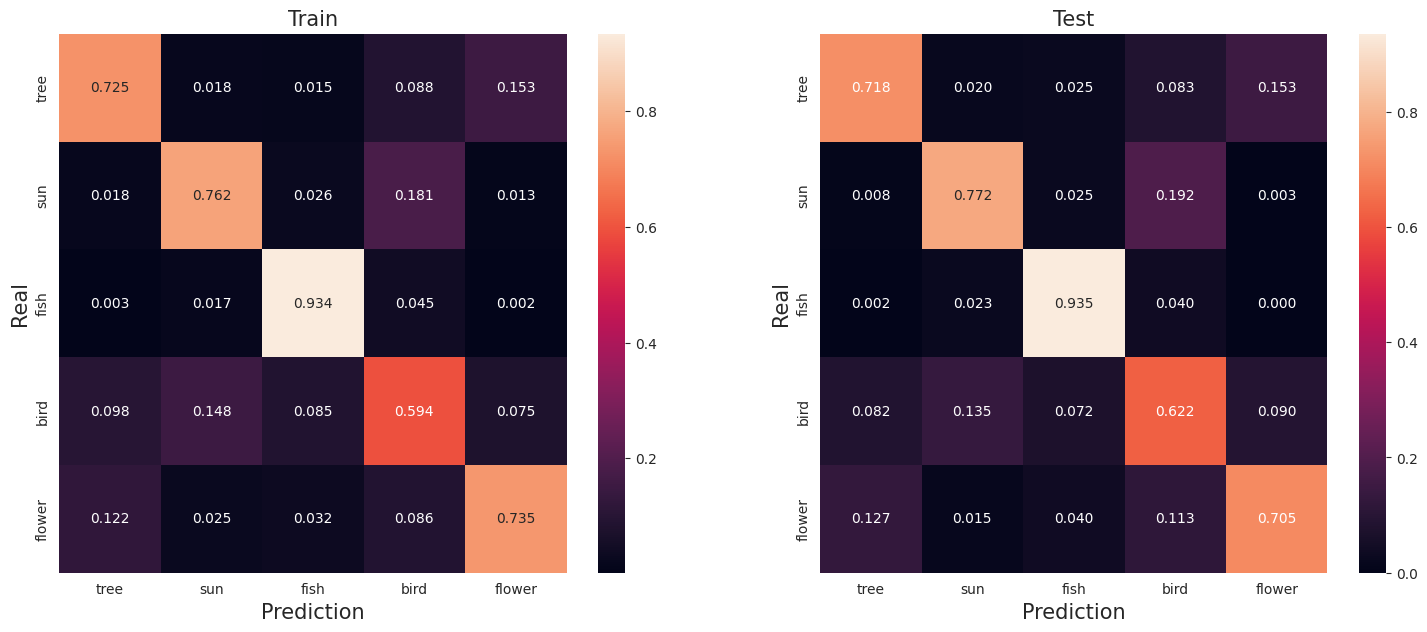

In [17]:
pipe = build_pipe(LinearDiscriminantAnalysis(covariance_estimator=EllipticEnvelope(), solver="eigen"))

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()

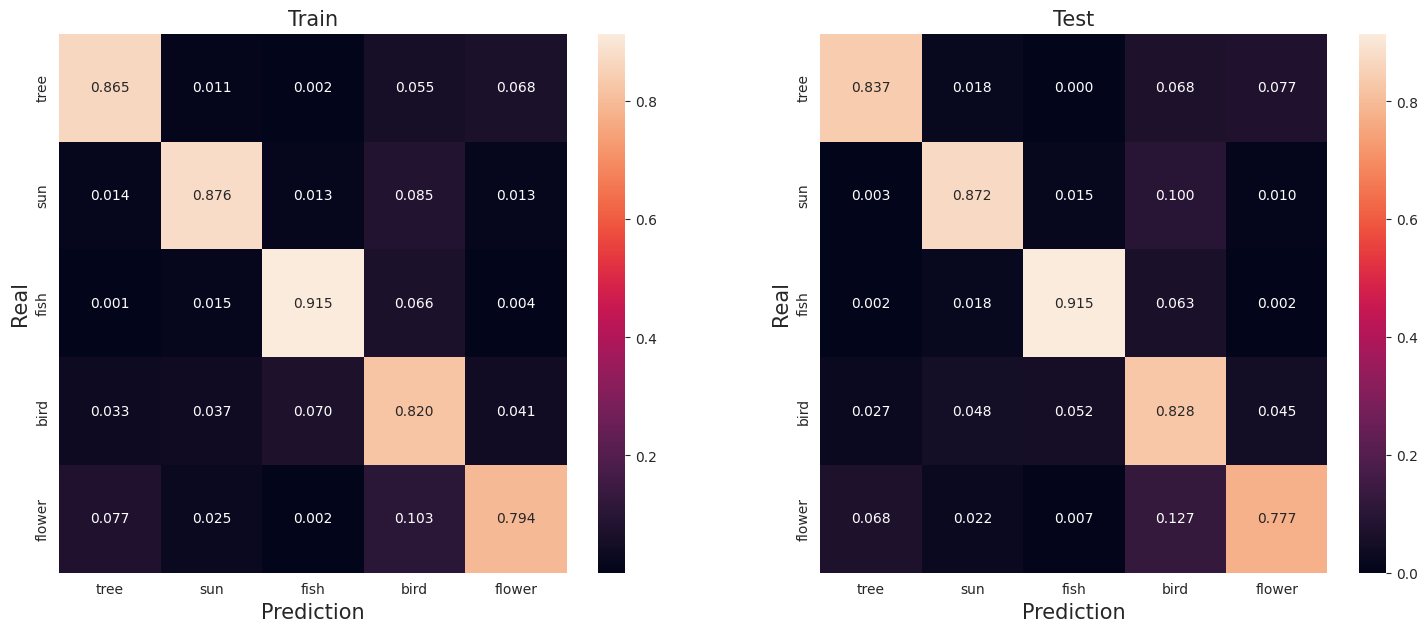

In [18]:
pipe = build_pipe(QuadraticDiscriminantAnalysis())

fitted = pipe.fit(input_train_matrix, target_train_matrix)

pred_train = pipe.predict(input_train_matrix)
train_confmat = confusion_matrix(target_train_matrix, pred_train, normalize="true")

pred_test = pipe.predict(input_test_matrix)
test_confmat = confusion_matrix(target_test_matrix, pred_test, normalize="true")


fig, ax = plt.subplots(1,2,figsize=(18,7))


heatmap_ax = sns.heatmap(train_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values(), ax=ax[0])
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Train")

heatmap_ax = sns.heatmap(test_confmat, annot=True, fmt="0.3f", xticklabels=label_names.values(), yticklabels=label_names.values())
heatmap_ax.set(xlabel="Prediction", ylabel="Real", title="Test")

plt.show()